In [1]:
#importing all necessary libraries and dependecy
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report




In [2]:
#loading the data


# Adjust the delimiter and path as necessary
train_data = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Data\codsodt_datas\Genre Classification Dataset\train_data.txt", delimiter=' ::: ', engine='python', names=["ID", "TITLE", "GENRE", "DESCRIPTION"])






In [3]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
test_data = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Data\codsodt_datas\Genre Classification Dataset\test_data.txt", delimiter=' ::: ', engine='python', names=["ID", "TITLE", "DESCRIPTION"])
test_solution = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Data\codsodt_datas\Genre Classification Dataset\test_data_solution.txt", delimiter=' ::: ', engine='python', names=["ID", "GENRE"])

In [5]:
test_data.head()



,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [6]:
test_solution.head()


,,ID,GENRE
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [7]:
print(train_data.describe())

                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


In [8]:
train_data.describe()  #to get statical overview of the data

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
#checking the null values 
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

Here we can see the training data dont have any null values 



# EDA analysis and visualization of data  


In [11]:
print(train_data.dtypes)


ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object


In [12]:
train_data['GENRE'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [13]:
train_data['GENRE'].value_counts()

GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

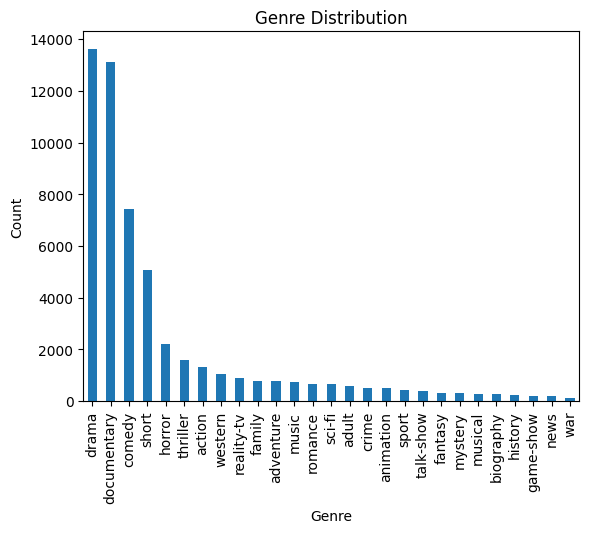

In [14]:
#lets explore genere distribution 
import matplotlib.pyplot as plt

genre_counts = train_data['GENRE'].value_counts()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()


In [15]:
#analysing descreption lenghth to understand text data better 
train_data['Description_Length'] = train_data['DESCRIPTION'].apply(len)

print(train_data['Description_Length'].describe())





count    54214.000000
mean       599.452429
std        446.026620
min         41.000000
25%        324.000000
50%        463.000000
75%        712.000000
max      10503.000000
Name: Description_Length, dtype: float64


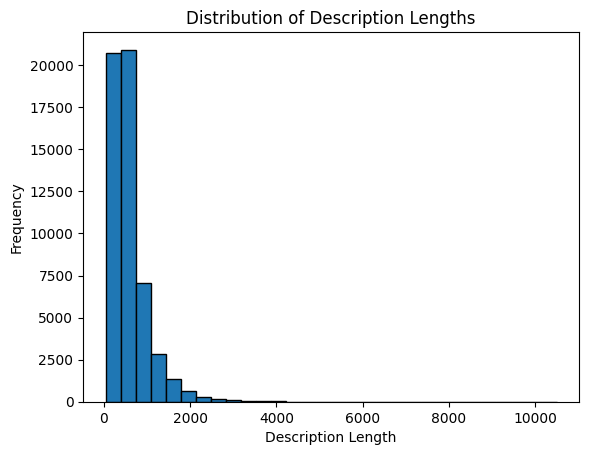

In [16]:
# Plot distribution of description lengths
train_data['Description_Length'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Lengths')
plt.show()

([<matplotlib.patches.Wedge at 0x1e4ce8f89d0>,
 [Text(0.7751309949797235, 0.7804946768695762, ' drama '),
  Text(-0.762411599254371, 0.7929240526824701, ' thriller '),
  Text(-1.0193078604662529, -0.41353534986952456, ' adult '),
  Text(-0.4882198001603478, -0.9857187361166421, ' documentary '),
  Text(-0.041995508176080186, -1.099198060994029, ' comedy '),
  Text(0.1987991203910609, -1.0818867360919722, ' crime '),
  Text(0.37731412834351874, -1.0332637845934458, ' reality-tv '),
  Text(0.5139250513297923, -0.9725641580973826, ' horror '),
  Text(0.618520985526583, -0.9096327778082893, ' sport '),
  Text(0.7034197140377126, -0.8456953978254244, ' animation '),
  Text(0.7768483440573641, -0.7787853685935114, ' action '),
  Text(0.8417701700470587, -0.7081122656888145, ' fantasy '),
  Text(0.896496379575944, -0.6374121440694595, ' short '),
  Text(0.942551260036864, -0.5670953378426947, ' sci-fi '),
  Text(0.9807462120117615, -0.4981333833669264, ' music '),
  Text(1.0103592232128416, -

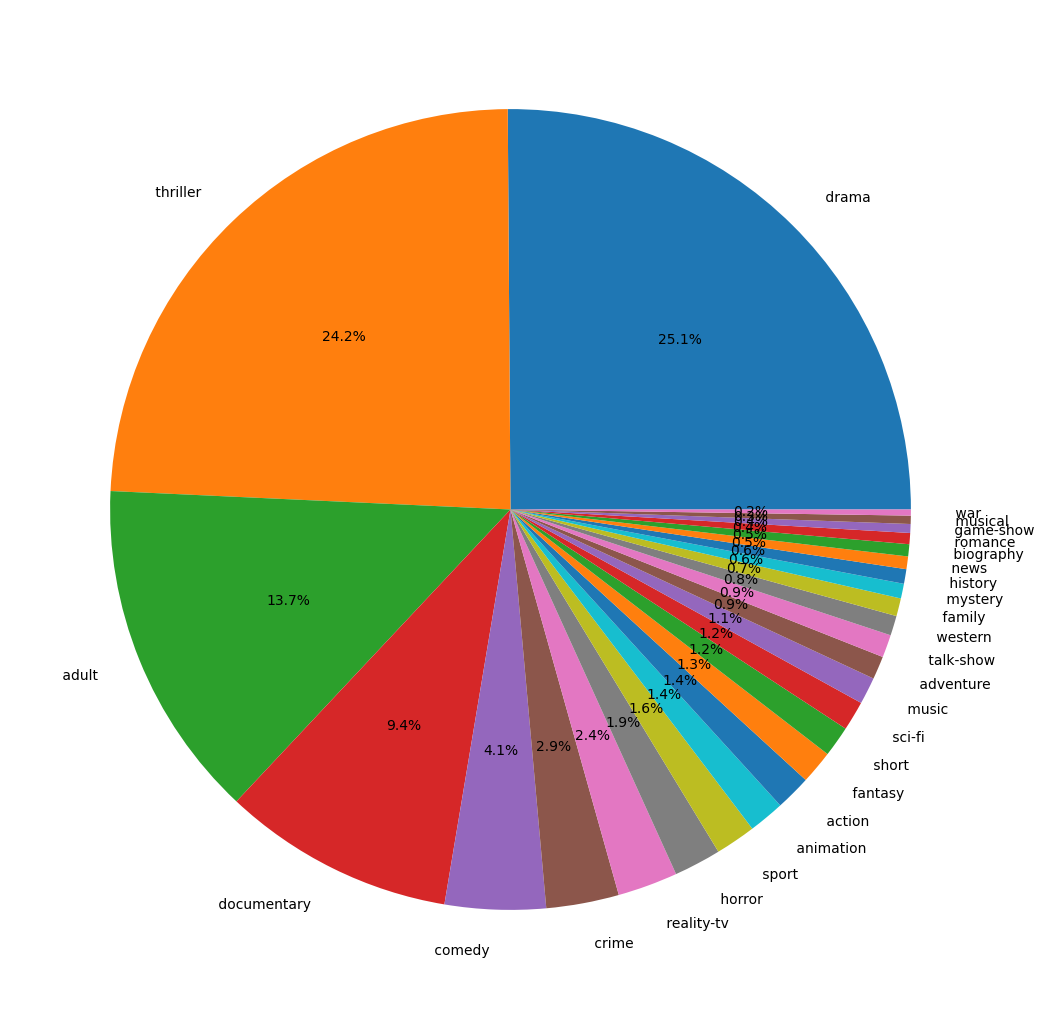

In [17]:
#plotting pie chart for GENRE for better visualizarion and understanding
plt.figure(figsize=(13,13))
plt.pie(train_data['GENRE'].value_counts(),labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.1f%%')

In [18]:
#Check for duplicates 
duplicates = train_data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Number of duplicates: 0


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  54214 non-null  int64 
 1   TITLE               54214 non-null  object
 2   GENRE               54214 non-null  object
 3   DESCRIPTION         54214 non-null  object
 4   Description_Length  54214 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [20]:
#lest explore sample descreption per genere
for genre in train_data['GENRE'].unique():
    print(f"\nGenre: {genre}")
    print(train_data[train_data['GENRE'] == genre]['DESCRIPTION'].sample(1).values[0])



Genre: drama
God Bless the Broken Road tells the story of a young mother who loses her husband in Afghanistan and struggles to raise their young daughter in his absence. The film combines elements of faith, country music, and stock car racing while paying tribute to those who serve in the United States Military.

Genre: thriller
Awaking after a car accident on an old road, Nick Hartzler finds his dreams are haunted by ghastly images of a local girl who disappeared years ago. As his dreams become more terrifying and his friends become more concerned, Nick decides that to keep his sanity, he must solve the mystery of the girl's disappearance himself. The trail of Nick's investigation however, leads to a story of betrayal and murder, which few people in a small Midwest town want to acknowledge. With dreams and ghosts driving him on, Nick desperately races to solve the mystery he's now part of. But what lies ahead even Nick couldn't dream of, and will push the bounds of reality in search 

In [21]:
import nltk


# data cleaning and preprossing 


In [22]:
#Cleaning  the DESCRIPTION column by removing non-alphabet characters and converting text to lowercase
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

train_data['cleaned_description'] = train_data['DESCRIPTION'].apply(clean_text)
test_data['cleaned_description'] = test_data['DESCRIPTION'].apply(clean_text)


In [23]:
# remocing punctuation
def remove_punct(text):
    import string as st
    punct=st.punctuation
    new_text=''.join([char for char in text if char not in punct])
    return new_text

train_data['DESCRIPTION']=train_data['DESCRIPTION'].apply(lambda x:remove_punct(x))

In [24]:
#performing text tokenization
from nltk.tokenize import word_tokenize

# Define tokenization function
def tokenize_description(text):
    tokens = word_tokenize(text)
    return tokens

# Apply the function to the 'DESCRIPTION' column in train data
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(tokenize_description)


In [25]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,cleaned_description
0,1,Oscar et la dame rose (2009),drama,"[Listening, in, to, a, conversation, between, ...",545,listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,"[A, brother, and, sister, with, a, past, inces...",183,a brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,"[As, the, bus, empties, the, students, for, th...",649,as the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,"[To, help, their, unemployed, father, make, en...",1081,to help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,"[The, films, title, refers, not, only, to, the...",624,the film s title refers not only to the un rec...


In [26]:
def stemming(text):
    from nltk import PorterStemmer
    ps=PorterStemmer().stem
    # dir(PorterStemmer())
    new_text=" ".join([ps(word) for word in text ]) 
    return new_text
train_data['DESCRIPTION']=train_data['DESCRIPTION'].apply(lambda x : stemming(x))

In [27]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,cleaned_description
0,1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...,545,listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,183,a brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,649,as the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,1081,to help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,624,the film s title refers not only to the un rec...


In [28]:
train_data.isnull().sum()

ID                     0
TITLE                  0
GENRE                  0
DESCRIPTION            0
Description_Length     0
cleaned_description    0
dtype: int64

# Text Vectorization


In [29]:
#Performing Text vectorization using TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=5000, stop_words=None)
Description_tf_idf = tf_idf.fit_transform(train_data['cleaned_description'])
print(Description_tf_idf.shape)




(54214, 5000)


In [30]:
Description_tf_idf=pd.DataFrame(Description_tf_idf.toarray())
Description_tf_idf.columns = tf_idf.get_feature_names_out()

Description_tf_idf 

,aaron,abandon,abandoned,abducted,abilities,ability,able,aboard,abortion,about,...,your,yourself,youth,youtube,zealand,zero,zombie,zombies,zone,zoo
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.031456,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.170899,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
54210,0.0,0.0,0.0,0.142746,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
54211,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.226004,...,0.189327,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
54212,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Feature Engineering


In [31]:
train_data['Description_Length'] = train_data['cleaned_description'].apply(lambda x: len(x))
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,cleaned_description
0,1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...,545,listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,183,a brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,649,as the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,1081,to help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,624,the film s title refers not only to the un rec...


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data['Description_len_sclr'] = scaler.fit_transform(train_data['Description_Length'].values.reshape(-1, 1))
train_data.head(5)

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,cleaned_description,Description_len_sclr
0,1,Oscar et la dame rose (2009),drama,listen in to a convers between hi doctor and p...,545,listening in to a conversation between his doc...,0.048174
1,2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,183,a brother and sister with a past incestuous re...,0.013573
2,3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,649,as the bus empties the students for their fiel...,0.058115
3,4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,1081,to help their unemployed father make ends meet...,0.099407
4,5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,624,the film s title refers not only to the un rec...,0.055725


In [33]:

train_data = train_data.drop(columns=['DESCRIPTION'])




In [34]:
target=train_data['GENRE']
feature=train_data.drop(['GENRE','TITLE','cleaned_description','Description_Length'],axis=1)

In [35]:
feature

,ID,Description_len_sclr
0,1,0.048174
1,2,0.013573
2,3,0.058115
3,4,0.099407
4,5,0.055725
...,...,...
54209,54210,0.044447
54210,54211,0.070637
54211,54212,0.020359
54212,54213,0.057350


In [36]:
target

0              drama
1           thriller
2              adult
3              drama
4              drama
            ...     
54209         comedy
54210         horror
54211    documentary
54212         comedy
54213        history
Name: GENRE, Length: 54214, dtype: object

In [42]:
feature.reset_index(drop=True, inplace=True)
Description_tf_idf.reset_index(drop=True, inplace=True)
feature = pd.concat([feature, pd.DataFrame(Description_tf_idf)], axis=1)

# Model training and Evaluation

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2)
print('x_train:',x_train.shape,'x_test:',x_test.shape,'y_train:',y_train.shape,'y_test:',y_test.shape)

x_train: (43371, 5002) x_test: (10843, 5002) y_train: (43371,) y_test: (10843,)


In [44]:
from sklearn.naive_bayes import MultinomialNB

model_1= MultinomialNB()
model_1.fit(x_train, y_train)


MultinomialNB()

In [45]:
#model evaluation of multinomialNB()
from sklearn.metrics import accuracy_score, classification_report

y_pred = model_1.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.47136401364935904
Classification Report:
               precision    recall  f1-score   support

      action       0.42      0.07      0.12       252
       adult       0.35      0.07      0.12       110
   adventure       0.50      0.03      0.05       150
   animation       0.25      0.02      0.04       102
   biography       0.03      0.02      0.03        46
      comedy       0.50      0.34      0.40      1534
       crime       0.11      0.01      0.02        98
 documentary       0.56      0.82      0.67      2612
       drama       0.44      0.77      0.56      2743
      family       0.40      0.04      0.07       161
     fantasy       0.06      0.04      0.05        53
   game-show       0.21      0.14      0.16        37
     history       0.00      0.00      0.00        50
      horror       0.73      0.18      0.29       447
       music       0.44      0.16      0.23       148
     musical       0.10      0.02      0.03        48
     mystery       0.04    

In [47]:
# Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
model_2= RandomForestClassifier(n_estimators=150, max_depth =50)
model_2.fit(x_train, y_train)




RandomForestClassifier(max_depth=50, n_estimators=150)

In [48]:
# Predictions
y_pred = model_2.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4653693627224938


c:\Users\sonam\miniconda3\envs\codsoft_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sonam\miniconda3\envs\codsoft_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.00      0.00      0.00       252
       adult       1.00      0.02      0.04       110
   adventure       0.43      0.02      0.04       150
   animation       0.00      0.00      0.00       102
   biography       0.00      0.00      0.00        46
      comedy       0.57      0.20      0.30      1534
       crime       0.00      0.00      0.00        98
 documentary       0.52      0.88      0.65      2612
       drama       0.40      0.83      0.54      2743
      family       1.00      0.01      0.02       161
     fantasy       0.00      0.00      0.00        53
   game-show       0.88      0.19      0.31        37
     history       0.00      0.00      0.00        50
      horror       0.73      0.05      0.09       447
       music       0.90      0.06      0.11       148
     musical       0.00      0.00      0.00        48
     mystery       0.00      0.00      0.00        71
        news       0.00    

c:\Users\sonam\miniconda3\envs\codsoft_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
model_2.score(x_train,y_train)


0.9716400359687348

In [51]:
model_1.score(x_train,y_train)

0.49546932281939543

# model saving on basisi of model score 

In [55]:
from joblib import dump

dump(model_2, 'Random_forest_model.joblib')

['Random_forest_model.joblib']